In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

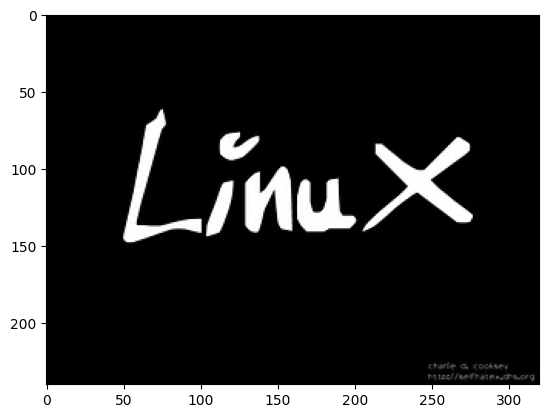

In [2]:
img = cv.imread("../OpenCV-images/LinuxLogo.jpg", 0)
plt.imshow(img, "gray")

In [4]:
np.unique(img) #Como no aparecen únicamente 0 y 1, entonces no está binarizada la imagen

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [8]:
img_bin = cv.threshold(img, 128, 255, cv.THRESH_BINARY)[1] #Ahora sí está binarizada
np.unique(img_bin)

array([  0, 255], dtype=uint8)

## Erode

Nos sirve para restar información.

In [7]:
kernel = np.ones((3,3), dtype=np.uint8)
kernel2 = np.ones((5,5), dtype=np.uint8)

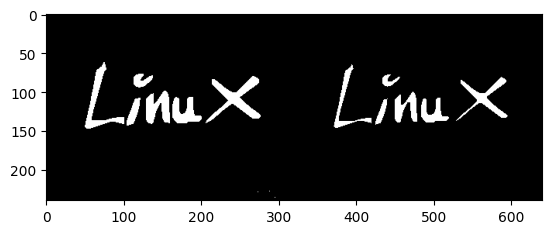

In [15]:
img_erode = cv.erode(img_bin, kernel)
plt.imshow(np.hstack((img_bin, img_erode)), "gray")

Con la erosión afectamos el primer plano. Nuestro primer plano es lo de blanco, puesto que con el kernel de 1s señalamos que nos interesa modificar toda aquella información diferente de 0.

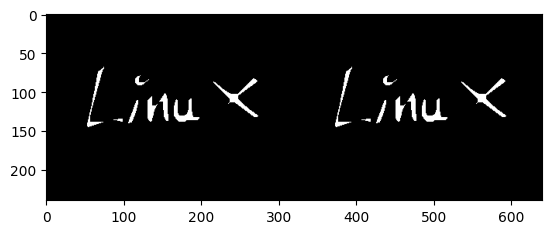

In [13]:
img_erode2 = cv.erode(img_bin, kernel2)
img_erode3 = cv.erode(img_bin, kernel, iterations= 2)
plt.imshow(np.hstack((img_erode2, img_erode3)), "gray")

Aquí comprobamos que la erosión con el kernel más grande es aproximadamente igual a erosionar la imagen dos veces con el kernel más pequeño.

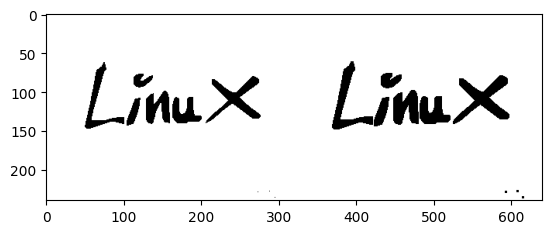

In [16]:
img_bin_inv = cv.threshold(img, 128, 255, cv.THRESH_BINARY_INV)[1]
img_erode_inv = cv.erode(img_bin_inv, kernel)
plt.imshow(np.hstack((img_bin_inv, img_erode_inv)), "gray")

En este caso sigue sucediendo lo mismo, porque la función erode quita la información de nuestro primer plano (lo blanco) por lo que vemos la presencia de más negro. En este sentido al trabajar sobre la imagen binarizada inversa sin cambiar nuestro kernel original es que obtenemos el mismo efecto que el de la dilatación.

## Dilate

Nos sirve para agregar información.

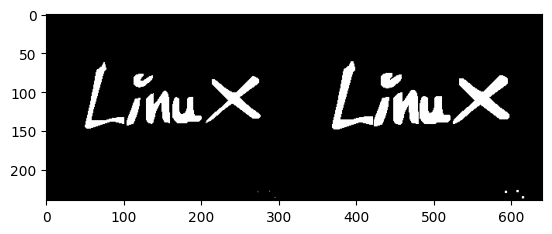

In [18]:
img_dilate = cv.dilate(img_bin, kernel)
plt.imshow(np.hstack((img_bin, img_dilate)), "gray")

## Apertura

In [20]:
img_open = cv.morphologyEx(img_bin, cv.MORPH_OPEN, kernel)

Con 'morphologyEx' podemos aplicar otras operaciones morfológicas que derivan de las primitivas.

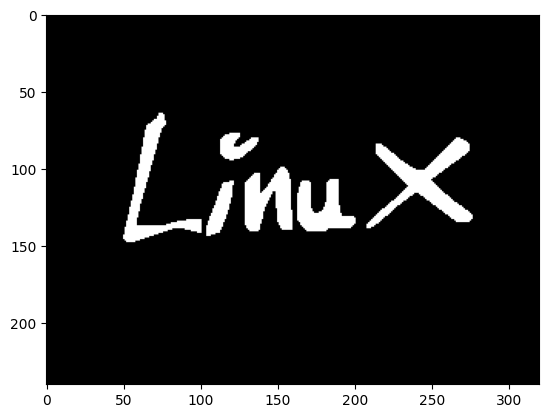

In [21]:
plt.imshow(img_open, "gray")

In [6]:
moneda = cv.imread("../OpenCV-images/coins.png", 0)
moneda_bin = cv.threshold(moneda, 128, 255, cv.THRESH_BINARY_INV)[1]

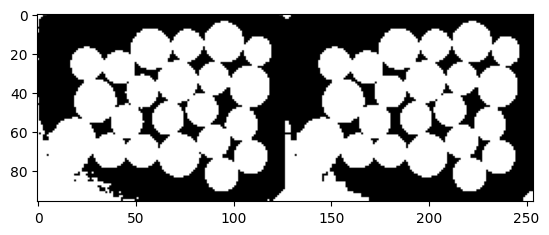

In [8]:
moneda_open = cv.morphologyEx(moneda_bin, cv.MORPH_OPEN, kernel)
plt.imshow(np.hstack((moneda_bin, moneda_open)), "gray")

## Close

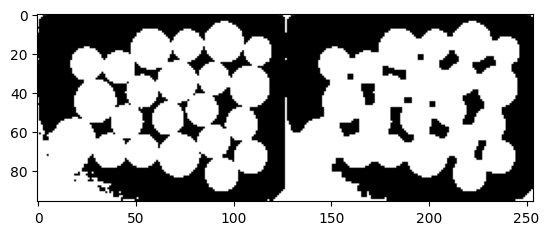

In [10]:
moneda_close = cv.morphologyEx(moneda_bin, cv.MORPH_CLOSE, kernel)
plt.imshow(np.hstack((moneda_bin, moneda_close)), "gray")

## Gradiente

Diferencia entre la dilatación y erosión de una imagen.

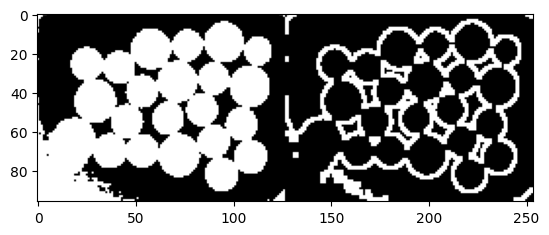

In [11]:
moneda_gradient = cv.morphologyEx(moneda_bin, cv.MORPH_GRADIENT, kernel)
plt.imshow(np.hstack((moneda_bin, moneda_gradient)), "gray")

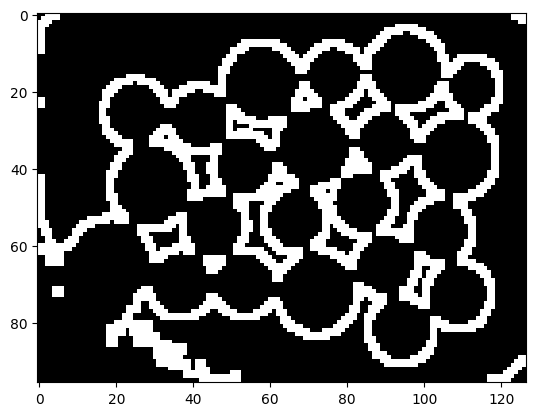

In [12]:
moneda_dilate = cv.dilate(moneda_bin, kernel)
moneda_erode = cv.erode(moneda_bin, kernel)
plt.imshow(moneda_dilate - moneda_erode, "gray")